In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv('dataset.csv')

In [3]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist_name       28506 non-null  object 
 1   track_name        30000 non-null  object 
 2   popularity        30000 non-null  float64
 3   acousticness      30000 non-null  float64
 4   danceability      30000 non-null  float64
 5   duration_ms       26990 non-null  float64
 6   energy            30000 non-null  float64
 7   instrumentalness  30000 non-null  float64
 8   key               30000 non-null  object 
 9   liveness          30000 non-null  float64
 10  loudness          30000 non-null  float64
 11  mode              30000 non-null  object 
 12  speechiness       30000 non-null  float64
 13  tempo             27067 non-null  float64
 14  valence           30000 non-null  float64
 15  music_genre       30000 non-null  object 
dtypes: float64(11), object(5)
memory usage: 

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,30000.000000,30000.000000,30000.000000,2.699000e+04,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,27067.000000,30000.000000
mean,47.769533,0.359661,0.540929,2.466460e+05,0.556709,0.180807,0.183610,-10.079862,0.083861,117.559824,0.446563
std,14.512665,0.364182,0.181719,1.126005e+05,0.277856,0.329365,0.150733,6.953936,0.093366,30.719934,0.248745
min,0.000000,0.000001,0.059600,1.550900e+04,0.000792,0.000000,0.015700,-47.046000,0.022300,34.347000,0.000000
25%,39.000000,0.029600,0.423000,1.904930e+05,0.361000,0.000000,0.095800,-12.057250,0.035000,92.340000,0.243000
50%,49.000000,0.205000,0.553000,2.245600e+05,0.602000,0.000089,0.122000,-7.623000,0.045100,115.491000,0.435000
75%,57.000000,0.710000,0.671000,2.726670e+05,0.786000,0.125250,0.222000,-5.429750,0.080300,139.817500,0.639000
max,99.000000,0.996000,0.977000,3.195440e+06,0.998000,0.994000,0.996000,1.342000,0.941000,219.331000,0.985000


Most of the features are numeric and five of them are categorical.

In [4]:
df.isnull().sum() / len(df) * 100

artist_name          4.980000
track_name           0.000000
popularity           0.000000
acousticness         0.000000
danceability         0.000000
duration_ms         10.033333
energy               0.000000
instrumentalness     0.000000
key                  0.000000
liveness             0.000000
loudness             0.000000
mode                 0.000000
speechiness          0.000000
tempo                9.776667
valence              0.000000
music_genre          0.000000
dtype: float64

Above cell shows the percent of missing datas of each feature.

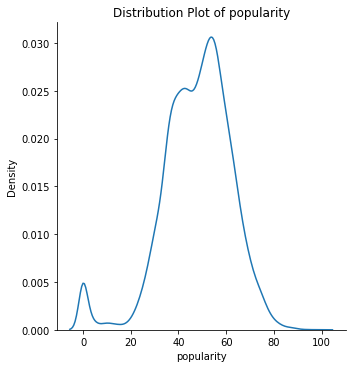

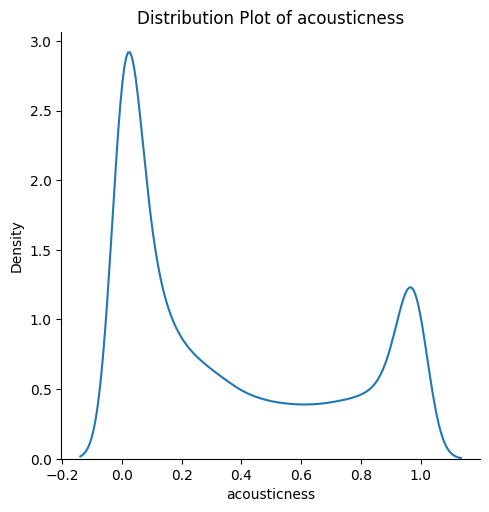

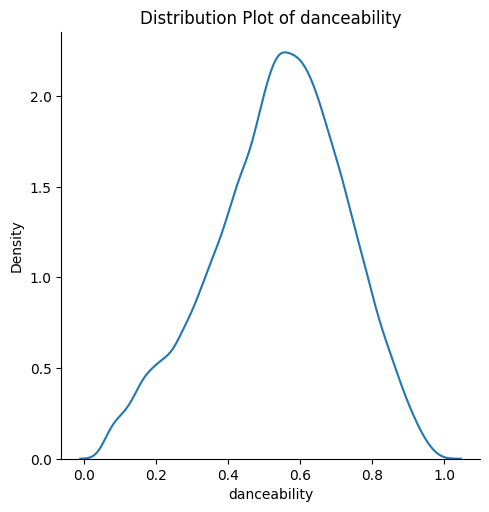

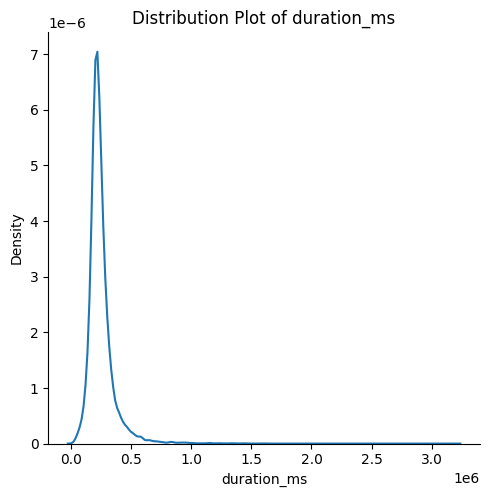

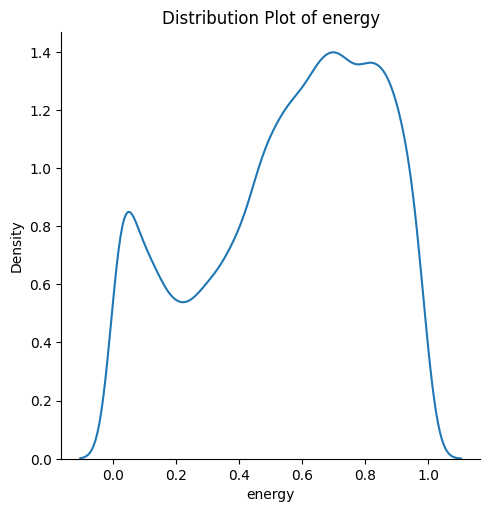

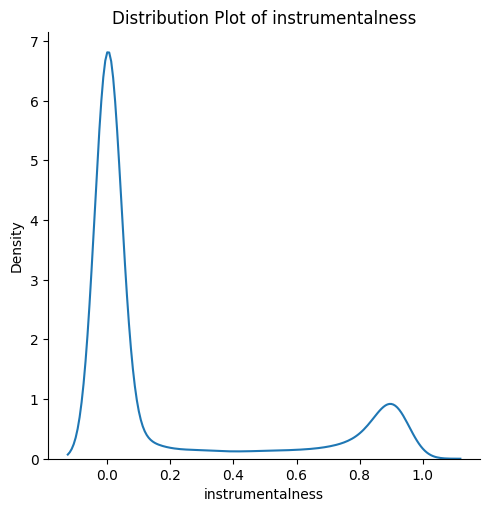

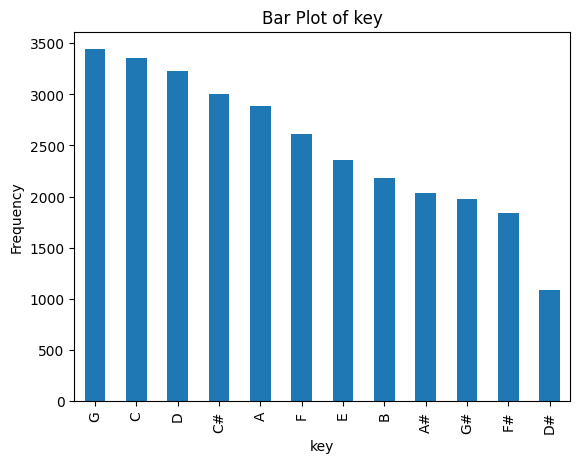

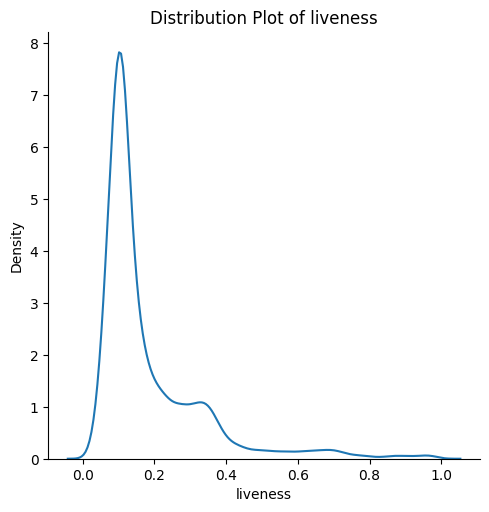

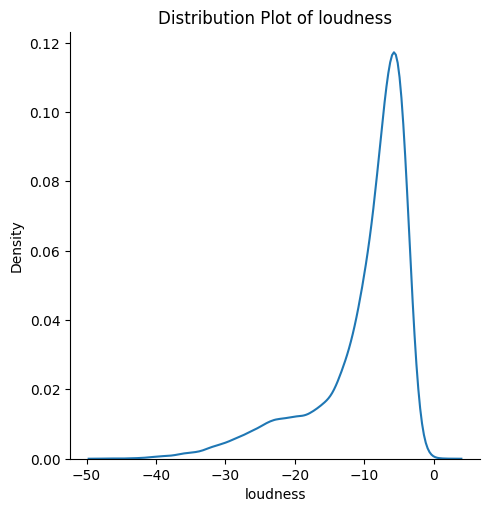

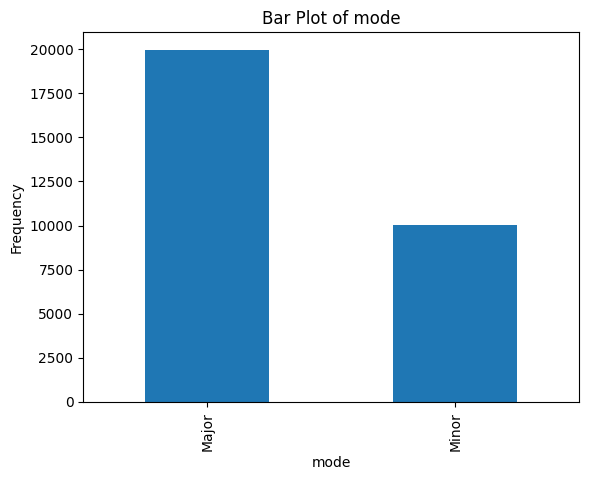

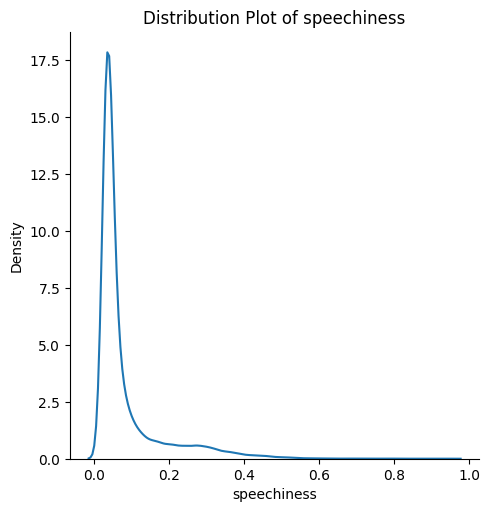

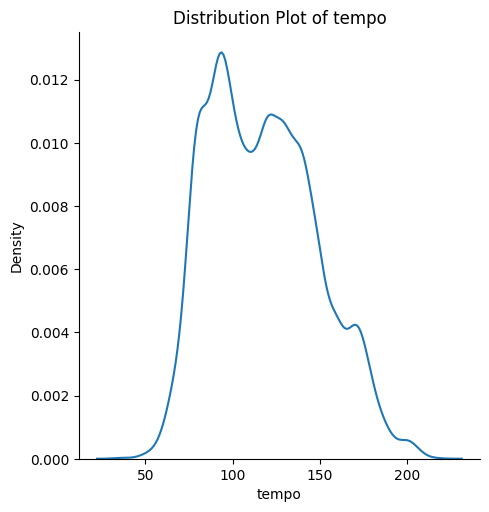

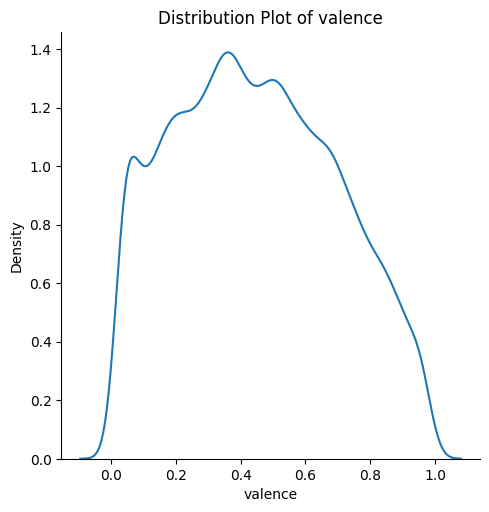

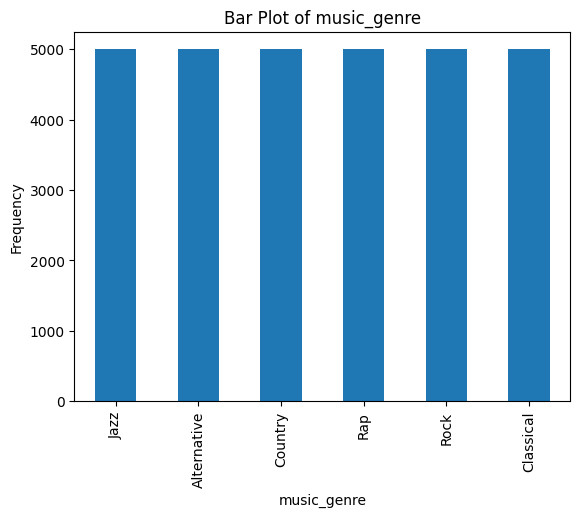

In [5]:
for feature in df:
    if str(df[feature].dtype) == 'float64':
        sns.displot(df[feature], kind='kde')
        plt.ylabel('Density')
        plt.title('Distribution Plot of %s' % feature)

    elif str(df[feature].dtype == 'object'):
        if feature in ['artist_name', 'track_name']:
            continue
        df[feature].value_counts().plot(kind='bar')
        plt.ylabel('Frequency')
        plt.title('Bar Plot of %s' % feature) 

    plt.xlabel(feature)       
    plt.show()

The numeric features distribution is normal.

There are several solutions for missing values problem. if the feature is numeric we can fill the missing value with mean or meadian and if it's categorical we can fill it with mode (the most frequently eccouring). another method is to assume the missing feature as label and make a model on top of this and try to predict the missing values. all the above method has advantages and disadvantages. for example if we take the mean of all examples in a feature, all missing datas in that feature will be the same and it's not a good model. for thet we can get mean of that feature for each label; for example calculate mean of all music durations with label jazz for filling the missing datas with jazz label.
in this project I filled missing values of numerical features with mean of each label.

Normalization and standardization are used in order to prevent the difference in scale for our features from making a noticeable intolerance during the information gain calculation and branching feature decision.
If we don't know about the distribution we use Normalization and if we know the distribution is Normal or Gaussion we should use Standardizarion. as we know our features distribution is Normal so we use Standardization.

In [6]:
numeric_features = []
for feature in df:
    if str(df[feature].dtype) == 'float64':
        numeric_features.append(feature)
standard_numeric_features = pd.DataFrame(StandardScaler().fit_transform(df[numeric_features]), columns=numeric_features)
for feature in numeric_features:
    df[feature] = standard_numeric_features[feature]

In [7]:
for feature in df:
    if df[feature].isnull().values.any():
        if str(df[feature].dtype) == 'float64':
            df[feature].fillna(df.groupby('music_genre')[feature].transform('mean'), inplace=True)
        
        if feature == 'artist_name':
            df[feature].fillna('None', inplace=True)
    
df.isnull().sum() / len(df) * 100

artist_name         0.0
track_name          0.0
popularity          0.0
acousticness        0.0
danceability        0.0
duration_ms         0.0
energy              0.0
instrumentalness    0.0
key                 0.0
liveness            0.0
loudness            0.0
mode                0.0
speechiness         0.0
tempo               0.0
valence             0.0
music_genre         0.0
dtype: float64

In order to work with categorical features, we have to encode them. there is three kind of categorical feature. first one is binary; for them we can simply map values to 0 and 1. next one is ordinal; we can encode them by integers. for example if the feature is size, we can map small to 0, medium to 1 and big to 2. for nominal features we should use one hot. In this project one of categorical features was binary and I used one hot encoding for rest of them.

Artist name and track name are nominal categorical features. so we should encode them with one hot. but if we do, the length of dataframe column will increase dramatically. so I dropped that features.

In [8]:
df.drop(['artist_name', 'track_name'], axis=1, inplace=True)
music_genre = {
    'Jazz' : 0,
    'Alternative' : 1,
    'Country' : 2,
    'Rap' : 3,
    'Rock' : 4,
    'Classical' : 5
}
df['music_genre'] = df['music_genre'].map(music_genre)
df = pd.get_dummies(df)

In above code I dropped artist name and track name and mapped music genre to integers.

In [9]:
x = df.drop('music_genre', axis=1)
y = df['music_genre']
mic = pd.DataFrame({'features':list(x.columns), 'mic':list(mutual_info_classif(x, y))})
mic

,features,mic
0,popularity,0.508241
1,acousticness,0.357052
2,danceability,0.275473
3,duration_ms,0.273091
4,energy,0.325418
5,instrumentalness,0.293003
6,liveness,0.018415
7,loudness,0.345851
8,speechiness,0.217920
9,tempo,0.260529


As we can see, some of the features have low information gain. so not all features would give us usefull data. Keeping more feature generally yields higher accuracy in many cases. However, keeping too many features can potentially lead to overfitting since training on some features can add a random behavior during decision making. it will also reduces computing time. in this example we can drop liveness, key and mode. if we drop them, accurecy will be reduced but computing time will be reduced as well. popularity, acousticness, danceability, duration_ms, energy, instrumentalness, loudness, speechiness, tempo and valence are usefull.

In [10]:
df.drop('liveness', axis=1, inplace=True)
df.drop(df.columns[df.columns.str.startswith('key')], axis=1, inplace=True)
df.drop(df.columns[df.columns.str.startswith('mode')], axis=1, inplace=True)
df.head(3)

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,loudness,speechiness,tempo,valence,music_genre
0,-0.259745,-0.970549,0.935920,0.349392,0.231385,-0.458790,0.381209,-0.489060,0.797711,0.644998,0
1,-0.948810,-0.034765,1.034976,-1.269495,-0.150114,-0.527955,-0.009655,1.072566,-1.223685,-0.641481,0
2,0.222600,-0.937900,0.704790,0.157418,1.181532,2.122888,0.431398,-0.493344,-0.190772,0.761585,0


I choose p = 0.8.
Yes, because choosing randomly removes any dependency between sequence of data.
Yes, because in other way it causes lack of data for training or testing.
Stratification means that the train_test_split method returns training and test subsets that have the same proportions of class labels as the input dataset.

In [11]:
x = df.drop('music_genre', axis=1)
y = df['music_genre']
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, stratify = y)

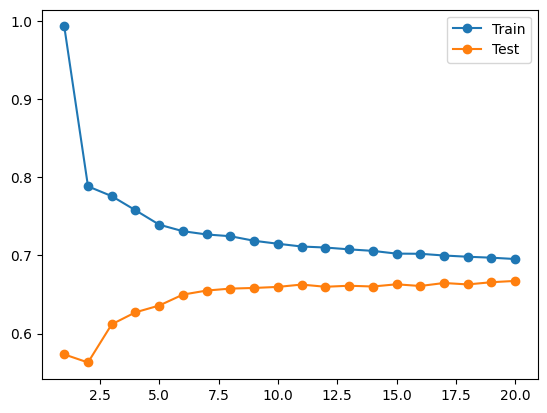

In [12]:
test_scores = []
train_scores = []
index = range(1,21)
for i in index:
    classifier = KNeighborsClassifier(n_neighbors=i)
    classifier.fit(x_train, y_train)
    pred_test = classifier.predict(x_test)
    test_scores.append(accuracy_score(y_test, pred_test))
    pred_train = classifier.predict(x_train)
    train_scores.append(accuracy_score(y_train, pred_train))

plt.plot(list(index), train_scores, '-o', label='Train')
plt.plot(list(index), test_scores, '-o', label='Test')
plt.legend()
plt.show()

When we increase n_neighbor, the generalization of the model will be increased so overfitting will be reduced.

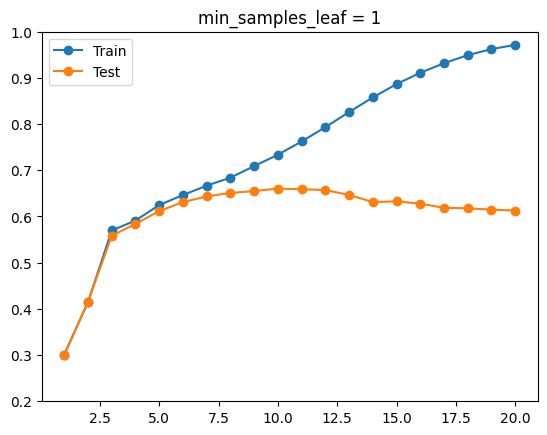

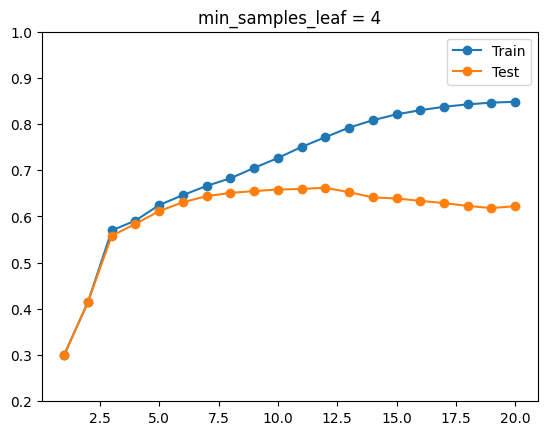

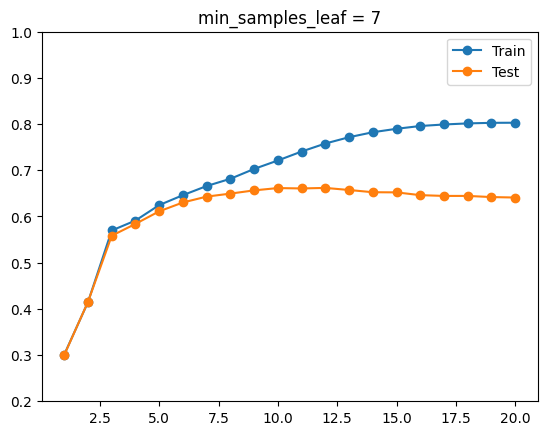

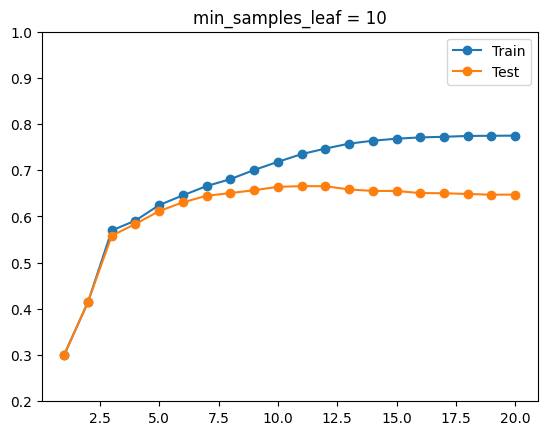

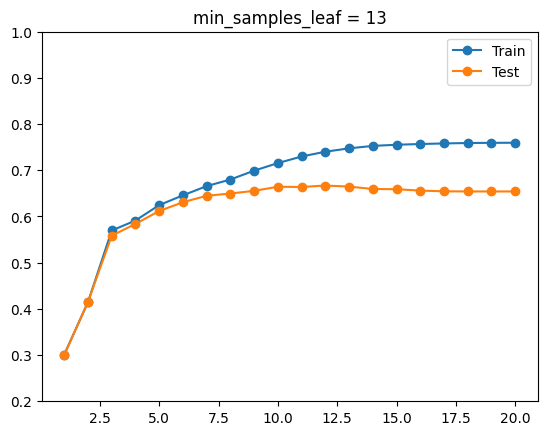

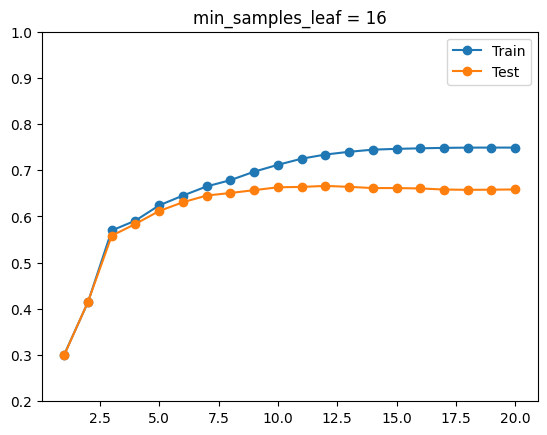

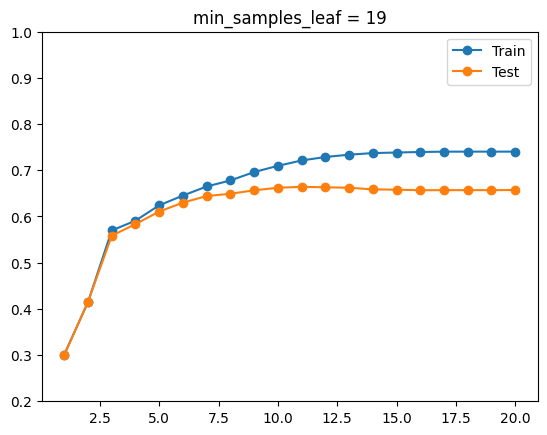

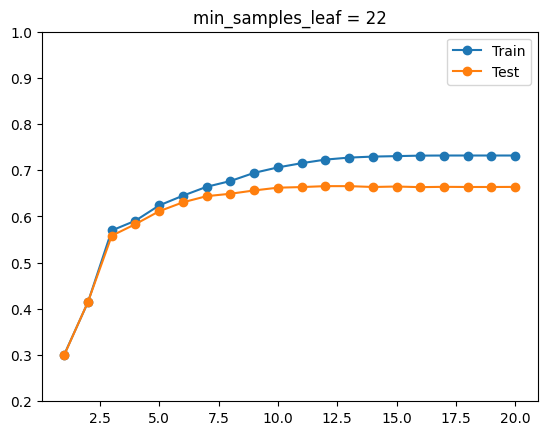

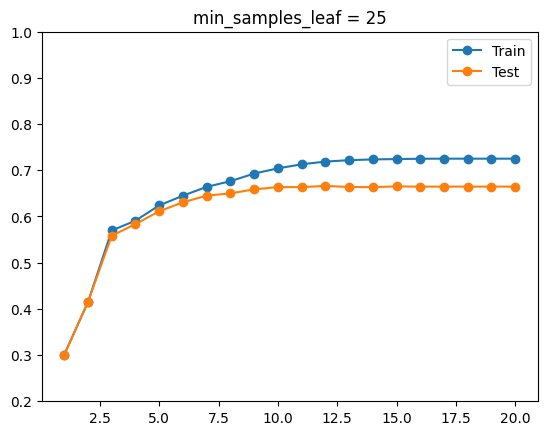

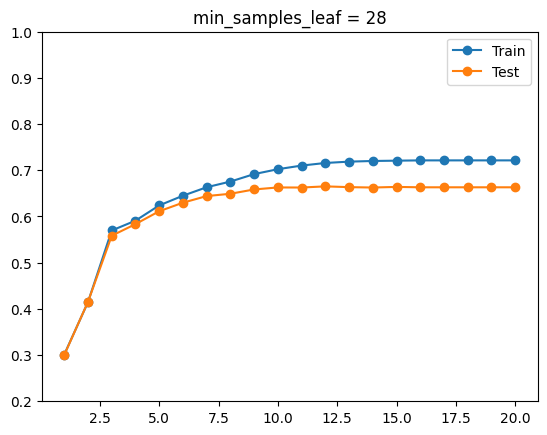

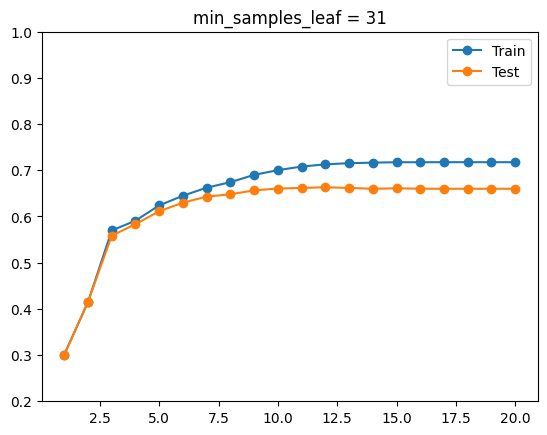

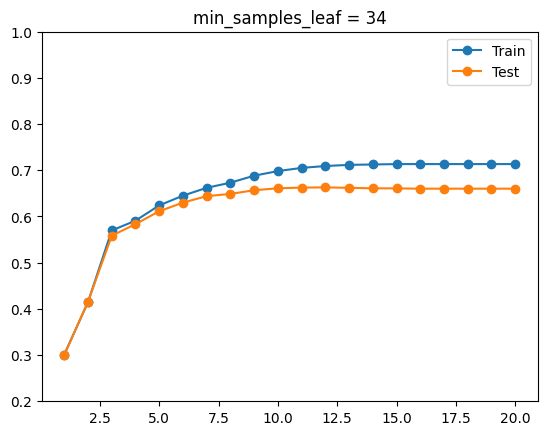

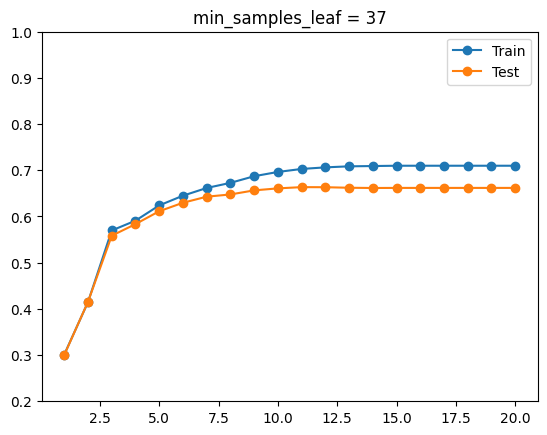

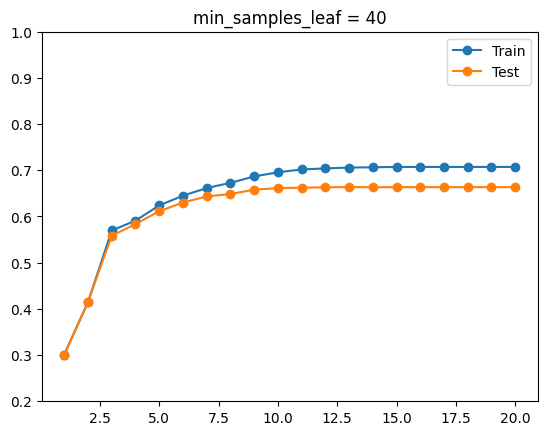

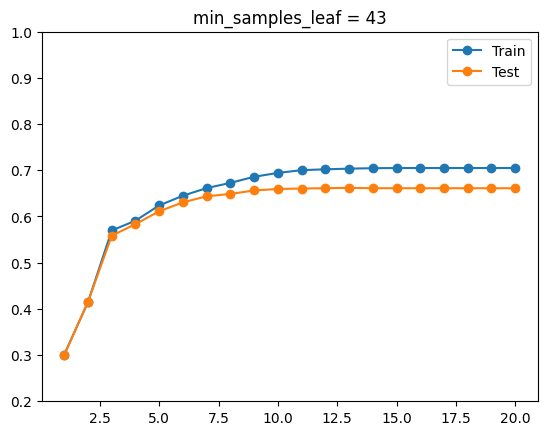

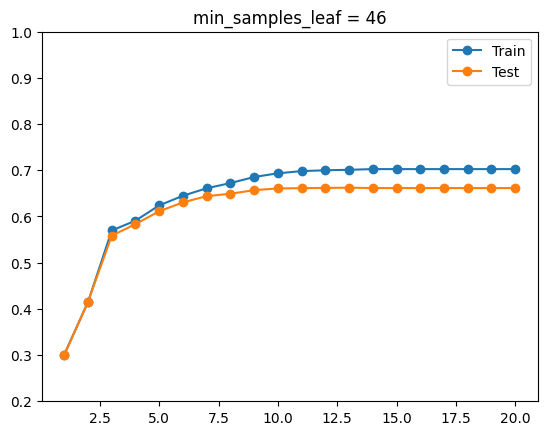

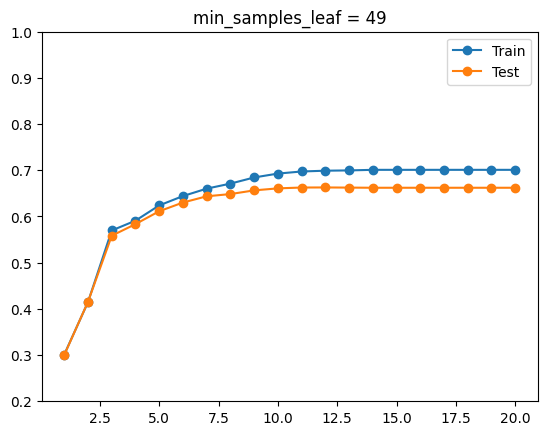

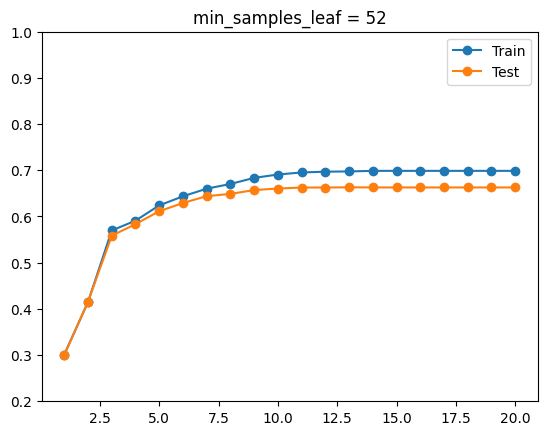

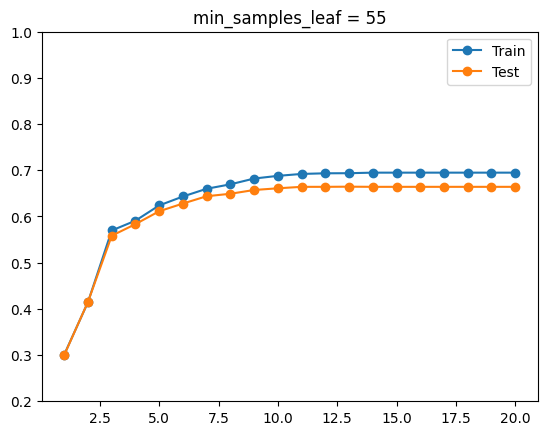

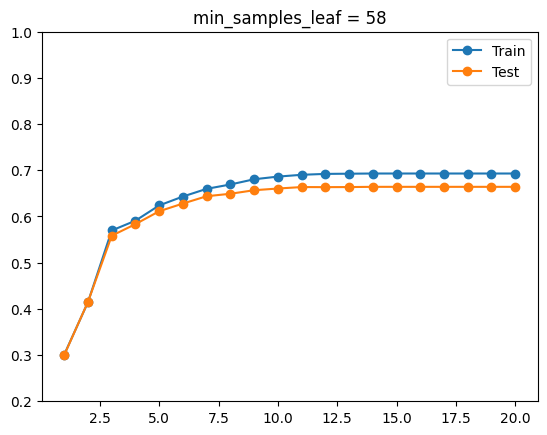

In [13]:
index = range(1,21)
for j in range(1,61,3):
    test_scores = []
    train_scores = []
    for i in index:
        classifier = DecisionTreeClassifier(max_depth=i, min_samples_leaf=j)
        classifier.fit(x_train, y_train)
        pred_test = classifier.predict(x_test)
        test_scores.append(accuracy_score(y_test, pred_test))
        pred_train = classifier.predict(x_train)
        train_scores.append(accuracy_score(y_train, pred_train))

    plt.title('min_samples_leaf = %d' % j)
    plt.plot(list(index), train_scores, '-o', label='Train')
    plt.plot(list(index), test_scores, '-o', label='Test')
    plt.ylim([0.2,1])
    plt.legend()
    plt.show()

*KNN:* There is no underfitting in the KNN model; however, a significant overfitting occurred in low n_neighbors.


*Decision Tree:* Underfitting can be seen in decision tree with respect to decreasing max_depth. In high max_depth, overfitting will be increase with respect to decreasing min_samples_leaf.

In [14]:
classifier = KNeighborsClassifier(n_neighbors=10)
classifier.fit(x_train, y_train)
pred_test = classifier.predict(x_test)
print(classification_report(y_test, pred_test))
pred_train = classifier.predict(x_train)
print(classification_report(y_train, pred_train))

              precision    recall  f1-score   support

           0       0.70      0.70      0.70      1000
           1       0.47      0.42      0.45      1000
           2       0.56      0.61      0.58      1000
           3       0.74      0.78      0.76      1000
           4       0.56      0.58      0.57      1000
           5       0.92      0.87      0.89      1000

    accuracy                           0.66      6000
   macro avg       0.66      0.66      0.66      6000
weighted avg       0.66      0.66      0.66      6000

              precision    recall  f1-score   support

           0       0.74      0.74      0.74      4000
           1       0.58      0.50      0.54      4000
           2       0.64      0.69      0.66      4000
           3       0.78      0.80      0.79      4000
           4       0.63      0.67      0.65      4000
           5       0.92      0.88      0.90      4000

    accuracy                           0.71     24000
   macro avg       0.72

*Precision:* Precision is defined as the ratio of true positives to the sum of true and false positives.
$ \frac{TP}{FP + TP} $


*Recall:* Recall is defined as the ratio of true positives to the sum of true positives and false negatives.
$ \frac{TP}{TP + FN} $


*F1 Score:* The F1 is the weighted harmonic mean of precision and recall. The closer the value of the F1 score is to 1.0, the better the expected performance of the model is.


*Support:* Support is the number of actual occurrences of the class in the dataset. It doesn’t vary between models, it just diagnoses the performance evaluation process.

In [15]:
classifier = DecisionTreeClassifier(max_depth=10, min_samples_leaf=60)
classifier.fit(x_train, y_train)
pred_test = classifier.predict(x_test)
print(classification_report(y_test, pred_test))
pred_train = classifier.predict(x_train)
print(classification_report(y_train, pred_train))

              precision    recall  f1-score   support

           0       0.63      0.67      0.65      1000
           1       0.58      0.39      0.47      1000
           2       0.60      0.58      0.59      1000
           3       0.74      0.77      0.75      1000
           4       0.53      0.69      0.60      1000
           5       0.89      0.85      0.87      1000

    accuracy                           0.66      6000
   macro avg       0.66      0.66      0.66      6000
weighted avg       0.66      0.66      0.66      6000

              precision    recall  f1-score   support

           0       0.67      0.70      0.69      4000
           1       0.62      0.41      0.49      4000
           2       0.63      0.63      0.63      4000
           3       0.76      0.79      0.77      4000
           4       0.56      0.73      0.64      4000
           5       0.89      0.86      0.88      4000

    accuracy                           0.69     24000
   macro avg       0.69

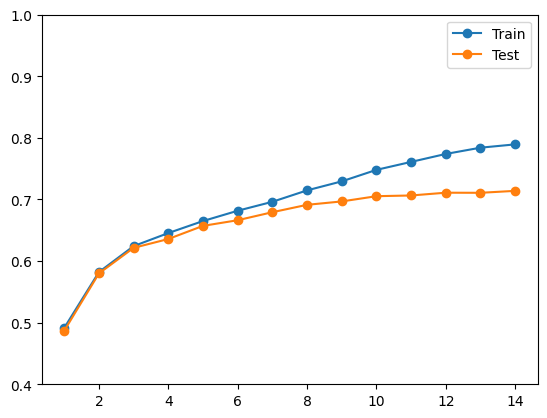

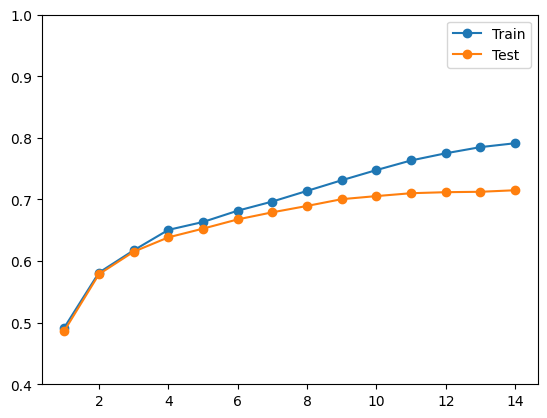

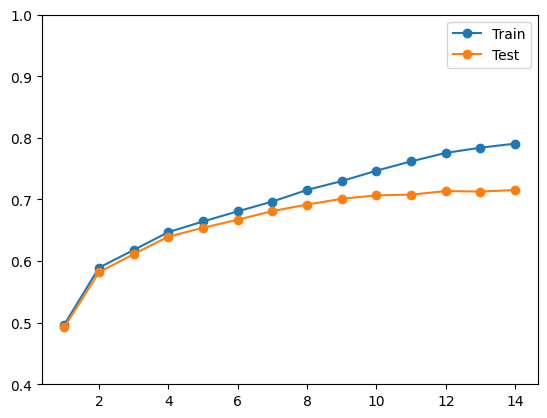

In [16]:

index = range(1,15)
for j in range(100,301,100):
    test_scores = []
    train_scores = []
    for i in index:
        classifier = RandomForestClassifier(max_depth=i, min_samples_leaf=10, n_estimators=j)
        classifier.fit(x_train, y_train)
        pred_test = classifier.predict(x_test)
        test_scores.append(accuracy_score(y_test, pred_test))
        pred_train = classifier.predict(x_train)
        train_scores.append(accuracy_score(y_train, pred_train))

    plt.plot(list(index), train_scores, '-o', label='Train')
    plt.plot(list(index), test_scores, '-o', label='Test')
    plt.ylim([0.4,1])
    plt.legend()
    plt.show()

*max_depth:* is the how many splits deep you want each tree to go.

*min_samples_leaf:* tells each tree to stop splitting if doing so would result in the end node of any resulting branch having less than 10 leaves.

*n_estimators:* is simply the number of trees. The more uncorrelated trees in our forest, the closer their individual errors get to averaging out.

The effect of max_depth and min_samples_leaf is just like decision tree and increasing n_estimators results better accuracy.

In [17]:
classifier = RandomForestClassifier(max_depth=11, min_samples_leaf=10, n_estimators=500)
classifier.fit(x_train, y_train)
pred_test = classifier.predict(x_test)
print(classification_report(y_test, pred_test))
pred_train = classifier.predict(x_train)
print(classification_report(y_train, pred_train))

              precision    recall  f1-score   support

           0       0.73      0.74      0.73      1000
           1       0.65      0.45      0.53      1000
           2       0.69      0.61      0.65      1000
           3       0.78      0.80      0.79      1000
           4       0.55      0.79      0.65      1000
           5       0.92      0.88      0.90      1000

    accuracy                           0.71      6000
   macro avg       0.72      0.71      0.71      6000
weighted avg       0.72      0.71      0.71      6000

              precision    recall  f1-score   support

           0       0.80      0.80      0.80      4000
           1       0.75      0.50      0.60      4000
           2       0.76      0.68      0.72      4000
           3       0.80      0.83      0.82      4000
           4       0.59      0.85      0.70      4000
           5       0.94      0.90      0.92      4000

    accuracy                           0.76     24000
   macro avg       0.77

In [18]:
print(confusion_matrix(y_test, pred_test))
print(confusion_matrix(y_train, pred_train))

[[738  42  76  21  55  68]
 [ 89 447 141 103 217   3]
 [ 76  60 615  28 220   1]
 [ 10  39   8 797 146   0]
 [ 22  65  44  77 787   5]
 [ 80  31   7   0   6 876]]
[[3216  107  218   82  175  202]
 [ 268 2014  438  395  875   10]
 [ 219  190 2737  102  749    3]
 [  25  108   41 3320  506    0]
 [  66  173  127  229 3396    9]
 [ 229   91   44    1   16 3619]]
